In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ['E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00016-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00017-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00018-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00019-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00020-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00021-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00022-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00023-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00024-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00025-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00026-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00027-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00028-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00030-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00031-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00032-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined1_df = dataframes[0]
for df in dataframes[1:]:
    combined1_df = combined1_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined1_file.csv'
combined1_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined1_file.csv\part-00000-0c00ce9b-317f-4e67-9680-88c594c3299c-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.020718,15725.00,17.00,64.00,15150.001456,15150.001456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310668e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
1,0.000000,54.00,6.00,64.00,1.807176,1.807176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.294751e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
2,0.182531,24842.62,16.89,65.70,2808.313546,2808.313546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.02,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,527.80,50.00,52.80,50.187256,0.695793,50.28,8.310227e+07,9.5,10.018620,0.986120,4.897941,0.10,141.55,DDoS-UDP_Flood
3,0.173534,17831.00,17.00,64.00,6078.773829,6078.773829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310194e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,0.154679,34017.50,17.00,64.00,53088.182711,53088.182711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310180e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699160,0.153154,46073.00,17.00,64.00,7042.215557,7042.215557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.312362e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
699161,0.072590,338.74,16.89,66.34,2.894366,2.894366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.05,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1686.06,147.06,162.00,160.893380,3.865579,160.63,8.300787e+07,9.5,17.937604,5.477123,90.572343,0.19,141.55,DoS-UDP_Flood
699162,8.628052,150.11,6.00,65.91,0.276772,0.276772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.03,0.29,0.04,0.41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,577.01,54.00,64.01,54.597176,2.366138,55.43,8.292508e+07,9.5,10.447976,3.357048,80.711784,0.07,141.55,DoS-TCP_Flood
699163,0.000000,54.00,6.00,64.00,1.068631,1.068631,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.308906e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            107669
DDoS-UDP_Flood              80923
DDoS-TCP_Flood              67051
DDoS-PSHACK_Flood           61353
DDoS-SYN_Flood              60962
DDoS-RSTFINFlood            60556
DDoS-SynonymousIP_Flood     53761
DoS-UDP_Flood               49700
DoS-TCP_Flood               40316
DoS-SYN_Flood               30176
BenignTraffic               16371
Mirai-greeth_flood          14887
Mirai-udpplain              13357
Mirai-greip_flood           11284
DDoS-ICMP_Fragmentation      6890
MITM-ArpSpoofing             4711
DDoS-ACK_Fragmentation       4391
DDoS-UDP_Fragmentation       4361
DNS_Spoofing                 2660
Recon-HostDiscovery          2016
Recon-OSScan                 1521
Recon-PortScan               1177
DoS-HTTP_Flood               1098
VulnerabilityScan             572
DDoS-HTTP_Flood               449
DDoS-SlowLoris                369
DictionaryBruteForce          171
SqlInjection                   90
BrowserHijacking               84
CommandInjecti

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

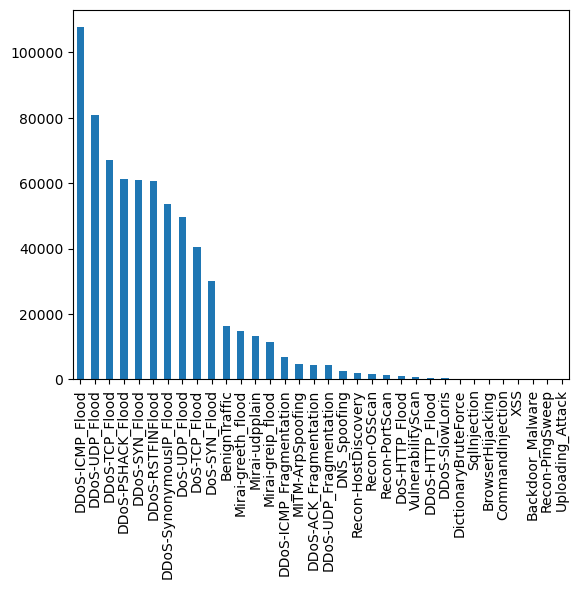

In [6]:
bar_graph('label')

In [7]:
#change Multi-class to binary-class
df['label'] = df['label'].replace(['DDoS-ICMP_Flood.','DDoS-UDP_Flood.','DDoS-TCP_Flood.','DDoS-PSHACK_Flood.','DDoS-SYN_Flood.','DDoS-RSTFINFlood.','DDoS-SynonymousIP_Flood.','DoS-UDP_Flood.','DoS-TCP_Flood.','DoS-SYN_Flood.','BenignTraffic.','Mirai-greeth_flood.','Mirai-udpplain.','Mirai-greip_flood.','DDoS-ICMP_Fragmentation.','MITM-ArpSpoofing.','DDoS-ACK_Fragmentation.','DDoS-UDP_Fragmentation.','DNS_Spoofing.','Recon-HostDiscovery.','Recon-OSScan.','Recon-PortScan.','DoS-HTTP_Flood.','VulnerabilityScan.','DDoS-HTTP_Flood.','DDoS-SlowLoris.','DictionaryBruteForce.','SqlInjection.','BrowserHijacking.','CommandInjection.','Backdoor_Malware.','XSS.','Uploading_Attack.','Recon-PingSweep.'], 'attack')


In [8]:
df['label'].unique()

array(['DDoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-UDP_Flood',
       'DDoS-TCP_Flood', 'DDoS-SYN_Flood', 'DoS-SYN_Flood',
       'DDoS-ICMP_Flood', 'Mirai-greeth_flood', 'Mirai-udpplain',
       'DDoS-SynonymousIP_Flood', 'DDoS-RSTFINFlood', 'DDoS-PSHACK_Flood',
       'Mirai-greip_flood', 'BenignTraffic', 'DDoS-UDP_Fragmentation',
       'MITM-ArpSpoofing', 'DDoS-ICMP_Fragmentation', 'DNS_Spoofing',
       'DDoS-ACK_Fragmentation', 'Recon-OSScan', 'Recon-PortScan',
       'Recon-HostDiscovery', 'DoS-HTTP_Flood', 'VulnerabilityScan',
       'DDoS-HTTP_Flood', 'DictionaryBruteForce', 'DDoS-SlowLoris',
       'BrowserHijacking', 'Backdoor_Malware', 'SqlInjection', 'XSS',
       'Recon-PingSweep', 'Uploading_Attack', 'CommandInjection'],
      dtype=object)

In [9]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.020718,15725.00,17.00,64.00,15150.001456,15150.001456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310668e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
1,0.000000,54.00,6.00,64.00,1.807176,1.807176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.294751e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,20
2,0.182531,24842.62,16.89,65.70,2808.313546,2808.313546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.02,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,527.80,50.00,52.80,50.187256,0.695793,50.28,8.310227e+07,9.5,10.018620,0.986120,4.897941,0.10,141.55,14
3,0.173534,17831.00,17.00,64.00,6078.773829,6078.773829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310194e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
4,0.154679,34017.50,17.00,64.00,53088.182711,53088.182711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310180e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699160,0.153154,46073.00,17.00,64.00,7042.215557,7042.215557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.312362e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
699161,0.072590,338.74,16.89,66.34,2.894366,2.894366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.05,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1686.06,147.06,162.00,160.893380,3.865579,160.63,8.300787e+07,9.5,17.937604,5.477123,90.572343,0.19,141.55,21
699162,8.628052,150.11,6.00,65.91,0.276772,0.276772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.03,0.29,0.04,0.41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,577.01,54.00,64.01,54.597176,2.366138,55.43,8.292508e+07,9.5,10.447976,3.357048,80.711784,0.07,141.55,20
699163,0.000000,54.00,6.00,64.00,1.068631,1.068631,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.308906e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,10


In [10]:
x=df.drop(columns=['label'])
y=df['label']

In [11]:
y

0         14
1         20
2         14
3         14
4         14
          ..
699160    14
699161    21
699162    20
699163    10
699164    20
Name: label, Length: 699165, dtype: int32

In [12]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 559332
Testing set: 139833


In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.801391660051633
precision: 0.8093279221596767
recall:  0.801391660051633
f1:  0.7671058618047467


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.992970185864567
precision: 0.9926753767956298
recall:  0.992970185864567
f1:  0.9923798153068585


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.7959709081547274
precision: 0.7511962766573225
recall:  0.7959709081547274
f1:  0.7415895218366166


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

# neural network

In [18]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [19]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(559332, 46)
(559332, 34)
(139833, 46)
(139833, 34)


In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [22]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [23]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
6967/6992 [============================>.] - ETA: 0s - loss: 0.4408 - accuracy: 0.8061
Epoch 1: val_accuracy improved from -inf to 0.84545, saving model to nn.hdf5
6992/6992 [==============================] - 13s 2ms/step - loss: 0.4407 - accuracy: 0.8061 - val_loss: 0.3717 - val_accuracy: 0.8455
Epoch 2/20
6970/6992 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9108
Epoch 2: val_accuracy improved from 0.84545 to 0.94839, saving model to nn.hdf5
6992/6992 [==============================] - 12s 2ms/step - loss: 0.2238 - accuracy: 0.9109 - val_loss: 0.1334 - val_accuracy: 0.9484
Epoch 3/20
6988/6992 [============================>.] - ETA: 0s - loss: 0.1250 - accuracy: 0.9525
Epoch 3: val_accuracy improved from 0.94839 to 0.95674, saving model to nn.hdf5
6992/6992 [==============================] - 12s 2ms/step - loss: 0.1249 - accuracy: 0.9525 - val_loss: 0.1056 - val_accuracy: 0.9567
Epoch 4/20
6990/6992 [============================>.] - ETA: 0s - l

Text(0, 0.5, 'accuracy')

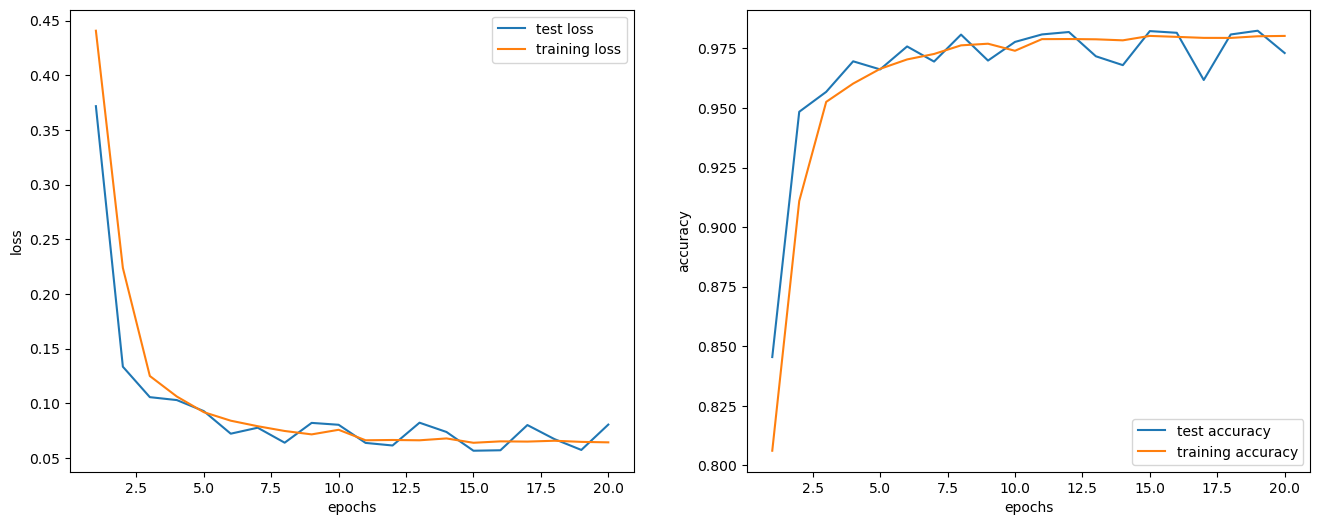

In [24]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [25]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

4370/4370 [==============================] - 3s 763us/step
Precision score:  0.9823265961914802
Recall score:  0.9828152152925275
F1 score:  0.9808912824184396


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
